# Hands-on session 1: Sub-halo abundance matching

*Tasks:*
1. Plot the SMF of galaxies, what do you observe? We will learn which physical processes give rise to this shape throughout the course. Convert the stellar mass function into an histogram of the number of galaxies expected in each bin given the simulation volume. Sample each bin space uniformly to generate an array of stellar mass values drawn from the SMF.
2. Sort the $M_h$ and the $M_∗$ arrays in decreasing order. Apply the SHAM method: the most massive galaxies live in the most massive haloes.
3. For each abundance matched halo, plot the $M_h$ vs $M_∗$ relation. What do you observe? What happens if you plot the $M_h$ vs $M_∗ / M_h$ relation? How do the values you find compare to the cosmic baryon fraction, defined as $Ω_b/Ω_{DM}$?. Assume $Ω_b = 0.045$ and $Ω_m = 0.31$, from Planck collaboration (2018).
4. Cosmological Hydrodynamic Simulations follow not only the evolution of dark-matter structures but also the formation and evolution of galaxies inside haloes. These simulations incorporate the baryon physics (and to some extent our uncertain understanding of some of these complex phenomena), therefore different simulations can provide different predictions. One of these simulations is Illustris TNG, which provides (among many other quantities) the stellar mass and the halo mass of galaxies and their haloes. These data are given in file `TNG_Mhalo_Mstar_h0.7.fits`, which is drawn from the TNG100 simulation, a trade-off of particle resolution and cosmological volume. Use these data to find the average $M_h$ vs $M_∗/M_h$ relation in TNG.

*Optional:* Satellite haloes (Type>0) orbit within more massive (Central, Type=0) haloes. During their journey, they lose mass due to dynamical friction and tidal stripping. As a result, the current $M_{VIR}$ is not the best tracer of the mass hierarchy of the halo. In this case, it has been proposed (see Conroy et al. 2006) that the halo maximum rotational velocity at the time of infall is a better tracer of the halo mass. Repeat your analysis using this quantity in the abundance matching algorithm, do you find differences in the $M_h$ vs $M_∗$ relation compared to what you obtained before?

In [60]:
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt

np.random.seed(42)

In [61]:
halo_table = Table.read('MR7_z0.0_L150_h0.7.fits')
star_table = Table.read('SMF_Baldry2012.txt', format='ascii.commented_header')

In [62]:
print(halo_table)

TYPE    X         Y        Z            MVIR        INFALLVMAX
---- -------- --------- -------- ------------------ ----------
   0  3.27417  74.68261 17.32758 1152069428571.4287  180.52757
   0  6.09376  80.91196  8.90322 1312528142857.1428  201.70636
   1  9.03828  74.13564  9.15919  53503015714.28572   71.65102
   0  0.94124  70.29736 12.89919 104246828571.42859    87.6633
   1  0.51411  70.06458 12.61891  65848628571.42857   70.21757
   0  13.0589  70.49874 16.80711 1736297714285.7144  199.12184
   2  1.84956  68.39413 11.03614  45289394285.71429   73.36893
   2  5.17399  61.57821  4.86685 233375357142.85718  122.67902
   1  15.8968  70.28729 18.53228  64485917142.85715   72.10719
   2 16.05532  70.29155 18.93444  538076285714.2857  154.58522
 ...      ...       ...      ...                ...        ...
   0 71.37853  88.53638  0.41144  87787542857.14285   79.58996
   0 70.49201  87.81304  0.30187 119334428571.42857   80.43822
   0 67.10048  86.93721  0.03711 105618571428.57143   7

In [63]:
print(star_table)
# Here, the masses are in log: M = 8.5 --> M = 10^8.5 solar masses.
# For the halos, instead, the units were directly solar masses.

Mass Density 
---- --------
 8.5   0.0192
 8.7    0.018
 8.9   0.0143
 9.1   0.0102
 9.3  0.00959
 9.5  0.00742
 9.7  0.00621
 9.9  0.00571
10.1  0.00551
10.3  0.00548
10.5  0.00512
10.7  0.00355
10.9  0.00241
11.1  0.00127
11.3 0.000338
11.5  4.2e-05
11.7  2.1e-05
11.9    1e-05


In [64]:
Mhalo = np.log10(halo_table['MVIR'])

Mstar = star_table['Mass']
Ndens = star_table['Density']

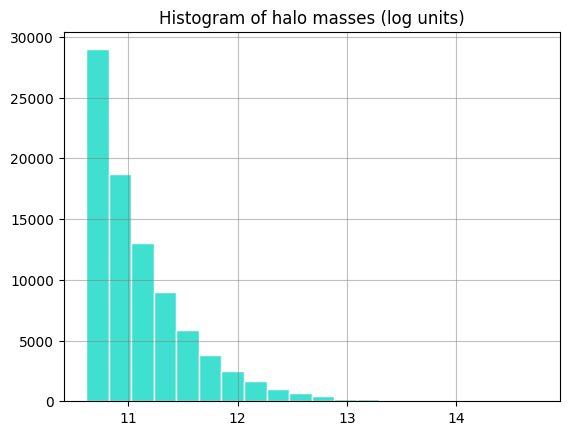

In [65]:
plt.hist(Mhalo, bins = 20, edgecolor = 'white', facecolor = 'turquoise', label = '-')
plt.grid(c='grey', alpha=0.5)
plt.title('Histogram of halo masses (log units)')
plt.show()

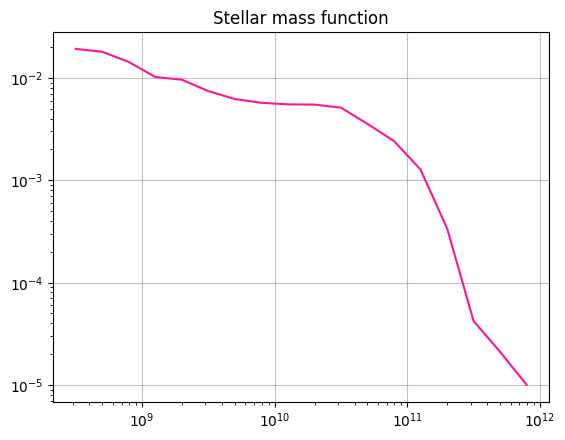

In [66]:
plt.plot(10**Mstar, Ndens, c='deeppink')
plt.grid(c='grey', alpha=0.5)
plt.title('Stellar mass function')
plt.xscale('log')
plt.yscale('log')
plt.show()

# The stellar mass function tells me how many galaxies (number density) I have per unit mass.

In [67]:
dexbin = 0.2
Ngal = Ndens*(150**3)*dexbin

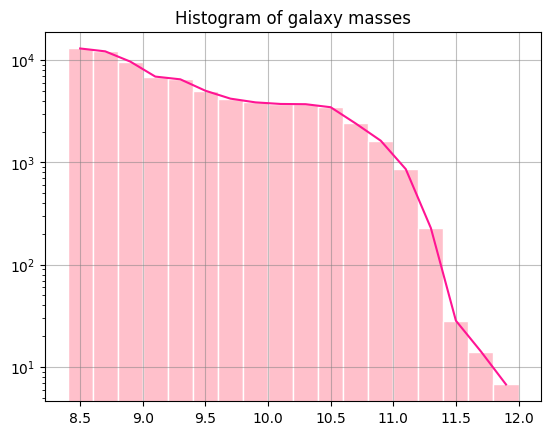

In [68]:
plt.bar(Mstar, Ngal, width = 0.2, color = 'pink', edgecolor = 'white', label = '-')
plt.plot(Mstar, Ngal, color = 'deeppink', label = '-')
plt.grid(c='grey', alpha=0.5)
plt.title('Histogram of galaxy masses')
plt.yscale('log')
plt.show()

Now I want to sample this function. I need to get to an array that has tot entries with mass uniformly sampled in each sample (mass between 8.4-8.6, etc...).

(He said not to be worried about the length of the two arrays: they don't have to be the same).

In [69]:
# min(Mstar) = 8.5
# max(Mstar) = 11.9

Mstar

8.5
8.7
8.9
9.1
9.3
9.5
9.7
9.9
10.1
10.3
10.5


In [70]:
m_star = []

for i in range(len(Mstar)):
    m_star = np.concatenate((m_star, np.random.uniform(Mstar[i]-0.1, Mstar[i]+0.1, int(Ngal[i]))))

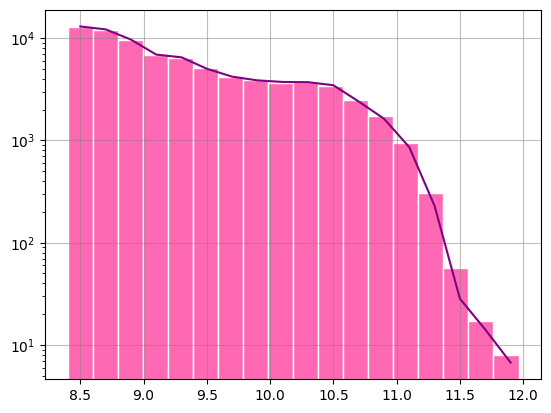

In [71]:
plt.hist(m_star, bins = 18, edgecolor = 'white', facecolor = 'hotpink', label = '-')

plt.plot(Mstar, Ngal, color = 'purple', label = '-')

plt.grid(c='grey', alpha=0.5)
plt.title('')
plt.yscale('log')
plt.show()

In [72]:
m_star

array([ 8.47490802,  8.59014286,  8.54639879, ..., 11.93359687,
       11.89678373, 11.96319147])

In [73]:
print(len(m_star))
print(len(Mhalo))

77202
86124


In [74]:
# Sort the galaxies array
m_star_s = -np.sort(-m_star)
print(m_star_s)

# Sort the haloes array
m_halo_s = -np.sort(-Mhalo)
print(m_halo_s)

[11.96319147 11.93359687 11.93184763 ...  8.40001057  8.40000614
  8.40000233]
       MVIR       
------------------
 14.73676081527862
 14.48787483875879
 14.35633243356424
14.336199164779028
14.312847570633789
14.304475694049335
14.267870162619621
14.264295073843945
14.257378406922774
 14.24561671681905
               ...
10.614361094770107
10.614361094770107
10.614361094770107
10.614361094770107
10.614361094770107
10.614361094770107
10.614361094770107
10.614361094770107
10.614361094770107
10.614361094770107
10.614361094770107
Length = 86124 rows


In [75]:
# Turn them in solar masses
m_star_sorted = 10**m_star_s
m_halo_sorted = 10**m_halo_s

In [76]:
# Cut them so they are the same length

length = min(len(m_halo_sorted), len(m_star_sorted))

m_halo_sorted = m_halo_sorted[:length]
m_star_sorted = m_star_sorted[:length]

print(len(m_halo_sorted))
print(len(m_star_sorted))

77202
77202


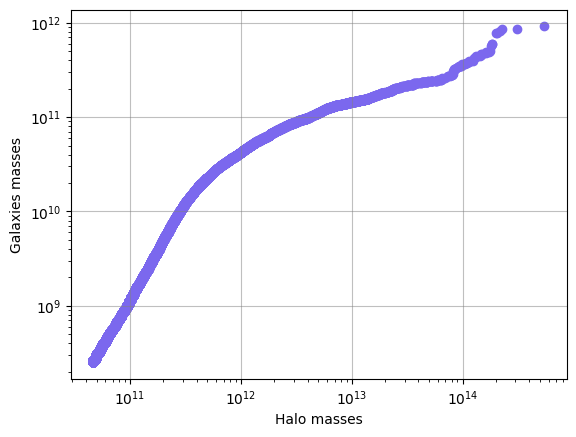

In [79]:
plt.scatter(m_halo_sorted, m_star_sorted, c = 'mediumslateblue', marker = 'o')
plt.xlabel('Halo masses')
plt.ylabel('Galaxies masses')
plt.grid(c='grey', alpha = 0.5)
plt.xscale('log')
plt.yscale('log')
plt.show()

In [86]:
Omega_m = 0.31
Omega_b = 0.045
Omega_DM = Omega_m - Omega_b

ratio_b_DM = Omega_b / Omega_DM
ratio_b_DM

0.16981132075471697

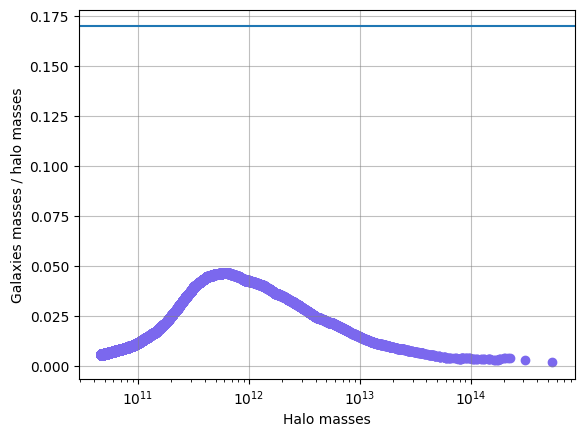

In [89]:
plt.scatter(m_halo_sorted, m_star_sorted/m_halo_sorted, c = 'mediumslateblue', marker = 'o')
plt.axhline(ratio_b_DM)     # Expected value
plt.xlabel('Halo masses')
plt.ylabel('Galaxies masses / halo masses')
#plt.yscale('log')
plt.xscale('log')
plt.grid(c='grey', alpha = 0.5)
plt.show()

# Se scegli questa hands-on, cerca di avere -2.25, -2.50 etc sugli assi, non 10^-2: più linee, più chiaro.

Questo rapporto è il massimo che potremmo avere: se tutto il gas (materia barionica) fosse convertito in stelle, il grafico sopra dovrebbe essere una linea costante a 0.169. Il fatto che non è così ci dice che la star formation rate è un processo molto poco efficiente, e soprattutto che ha efficienza diversa a seconda della massa dell'halo ospitante. 

THERE IS A PREFERRED MASS FOR MAXIMUM EFFICIENCY IN SFR!

This shape is regulated from different processes: something reduces the efficiency at high mass, and something else at low mass. We'll see.

Now, add TNG:

In [ ]:
#######################################
# Ti viene uno scatter plot a > per M_h vs M_s/M_h. Anna ha binnato e preso la media del valore nel bin. 
# Il prof ha detto che il valore di Anna è giusto. Cerca di capire perché si fa così.
#######################################
# Forse è perché, sopra, col fatto che è tutto sorted, binnare avrebbe dato la stessa cosa ma più discreta. Qui invece, essendo un macello,
# binnare e fare la media del valore nel bin serve a dire, "per questa halo mass, qual è il SFR medio?"
#######################################